<a href="https://colab.research.google.com/github/tirthamutha/repository/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Final

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'statsmodels'

In [4]:
import pandas as pd
import requests
from io import BytesIO

# URL ke Google Sheets (format Excel)

url = "https://docs.google.com/spreadsheets/d/12EuA3FX_e3Xh1xRxn13qX2mOKzAkZgE7/export?format=xlsx"

# Unduh file Excel ke memori
response = requests.get(url)
file_data = BytesIO(response.content)

# Baca Excel ke DataFrame (opsional: sheet_name bisa diatur jika ada banyak sheet)
df = pd.read_excel(file_data, sheet_name=0, engine='openpyxl')
display(df.head())

,invoicedate,so,jml
0,2024-01-05,BSO,1
1,2024-01-24,BSO,4
2,2024-01-31,BSO,51
3,2024-01-27,BSO,1
4,2024-02-06,BSO,2


In [5]:
# Create a new DataFrame by grouping by 'invoicedate' and summing 'jml'
data = df.groupby('invoicedate')['jml'].sum().reset_index()

# Rename the aggregated column for clarity
data = data.rename(columns={'jml': 'jumlah'})

# Display the new DataFrame
display(data.head())

,invoicedate,jumlah
0,2024-01-02,1589
1,2024-01-03,599
2,2024-01-04,1089
3,2024-01-05,347
4,2024-01-06,121


In [ ]:
# Pembagian Data
train_size = 420
test_size = len(data) - train_size
train_data = data.iloc[0:train_size].copy()
test_data = data.iloc[train_size:len(data)].copy()

In [ ]:
#CONVERTING DATE TO DATE TIME OBJECT

train_data['invoicedate']=pd.to_datetime(train_data['invoicedate'],format='%Y-%m')

In [ ]:
#CONVERTING DATE TO DATE TIME OBJECT

test_data['invoicedate']=pd.to_datetime(test_data['invoicedate'],format='%Y-%m')

<Axes: xlabel='invoicedate', ylabel='jumlah'>

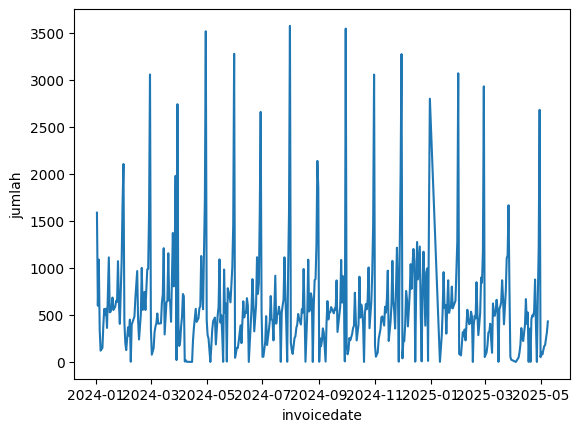

In [ ]:
sns.lineplot(x='invoicedate',y='jumlah',data=train_data)
plt.title('Time Series Plot')
plt.show()

In [10]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

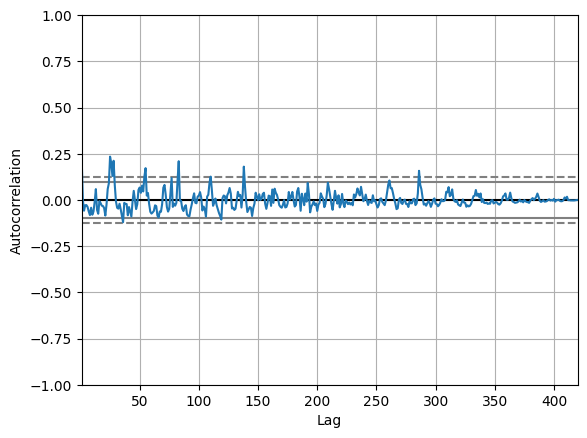

In [ ]:
autocorrelation_plot(train_data['jumlah'])
plt.title('Autocorrelation Plot')
plt.show()

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

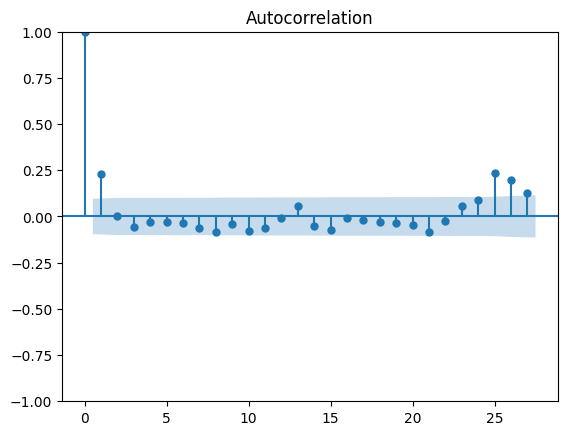

In [ ]:
plot_acf(train_data['jumlah'])
plt.title('ACF Plot')
plt.show()

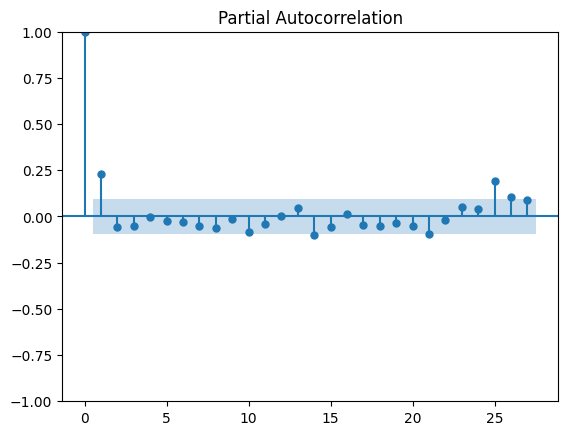

In [ ]:
plot_pacf(train_data['jumlah'])
plt.title('PACF Plot')
plt.show()

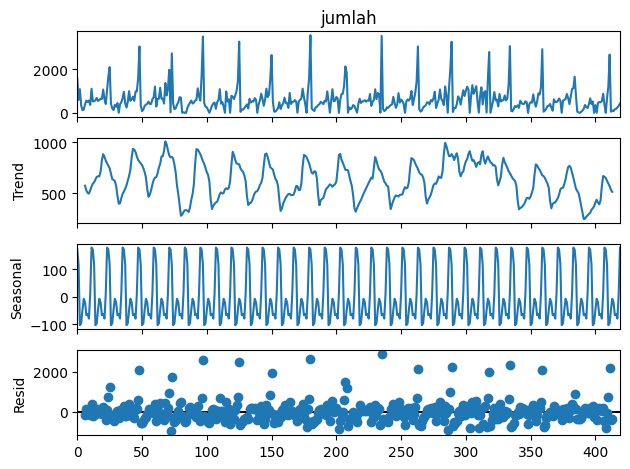

In [ ]:
decomposition=seasonal_decompose(train_data['jumlah'],model='additive',period=12)
decomposition.plot()
plt.suptitle('Seasonal Decomposition')
plt.show()

In [1]:
dftest = adfuller(train_data['jumlah'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

NameError: name 'adfuller' is not defined

In [ ]:
data_diff=train_data['jumlah'].diff(periods=350)

In [18]:
dftest = adfuller(data_diff.dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -5.622454365430285
2. P-Value :  1.136942580442217e-06
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 69
5. Critical Values :
	 1% :  -3.528889992207215
	 5% :  -2.9044395987933362
	 10% :  -2.589655654274312


In [19]:
!pip install pmdarima

In [21]:
import pmdarima

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
model=pmdarima.auto_arima(train_data['jumlah'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

NameError: name 'pmd' is not defined

In [ ]:
sarima=SARIMAX(train_data['jumlah'],order=(1,1,1),seasonal_order=(1,0,1,12))
predicted=sarima.fit().predict()
print(predicted)

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(train_data['jumlah'],label='Actual')
plt.plot(predicted,label='Predicted')
plt.legend()
plt.title('SARIMA Model - Training Data')
plt.show()

In [ ]:
resid=train_data['jumlah']-predicted
mae=abs(resid.mean())
print(f"Residuals: {resid}")
print(f"MAE: {mae}")

In [ ]:
plt.hist(resid)
plt.title('Residuals Distribution - Training Data')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
#residuals follow Normal distribution

In [ ]:
mse = (resid**2).mean()
print(f"MSE: {mse}")

In [ ]:
sarima1=SARIMAX(test_data['jumlah'],order=(1,1,1),seasonal_order=(1,0,1,12))
predicted1=sarima1.fit().predict()
print(predicted1)

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(test_data['jumlah'],label='Actual')
plt.plot(predicted1,label='Predicted')
plt.legend()
plt.title('SARIMA Model - Test Data')
plt.show()

In [ ]:
resid1=test_data['jumlah']-predicted1
mae1=abs(resid1.mean())
print(f"Test Residuals: {resid1}")
print(f"Test MAE: {mae1}")

In [ ]:
plt.hist(resid1)
plt.title('Residuals Distribution - Test Data')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import scipy.stats

In [ ]:
resid11=scipy.stats.boxcox(abs(resid1))
plt.hist(resid11)
plt.title('Box-Cox Transformed Residuals')
plt.xlabel('Transformed Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
mse1 = (resid1**2).mean()
print(f"Test MSE: {mse1}")

In [ ]:
model=pmdarima.auto_arima(train_data['jumlah'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

In [ ]:
pred=model.predict(n_periods=12)
print(pred)

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(train_data['jumlah'], label='Actual')
plt.plot(pred, label='Predicted')
plt.legend()
plt.title('Auto ARIMA - Training Data')
plt.show()

In [ ]:
model.fit(test_data['jumlah'])
pred1=model.predict(n_periods=12)
print(pred1)

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(test_data['jumlah'], label='Actual')
plt.plot(pred1, label='Predicted')
plt.legend()
plt.title('Auto ARIMA - Test Data')
plt.show()

In [ ]:
print(f"Type of predicted: {type(predicted)}")

In [ ]:
temp=pd.Series(train_data['jumlah'])
print(temp)

In [ ]:
print(f"Type of temp: {type(temp)}")

In [ ]:
temp1=pd.concat([predicted,pred])
print(temp1)

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(temp,label='Actual')
plt.plot(temp1,label='Predicted')
plt.legend()
plt.title('Combined Training Data and Predictions')
plt.show()

In [ ]:
newtemp=test_data['jumlah']
newertemp=pd.concat([predicted1,pred1])
print(newertemp)

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(test_data['jumlah'],label='Actual')
plt.plot(newertemp,label='Predicted')
plt.legend()
plt.title('Combined Test Data and Predictions')
plt.show()